In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import matplotlib.pyplot as plt
from sklearn import linear_model

sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [79]:
df = pd.read_csv('csvs/baseball.csv')
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [80]:
df['RD'] = df['RS'] - df['RA']

In [81]:
df = df[df.Year < 2002]

In [82]:
mbplayoffs = df[df.Playoffs == 1]

In [83]:
mbnoplayoffs = df[df.Playoffs == 0]

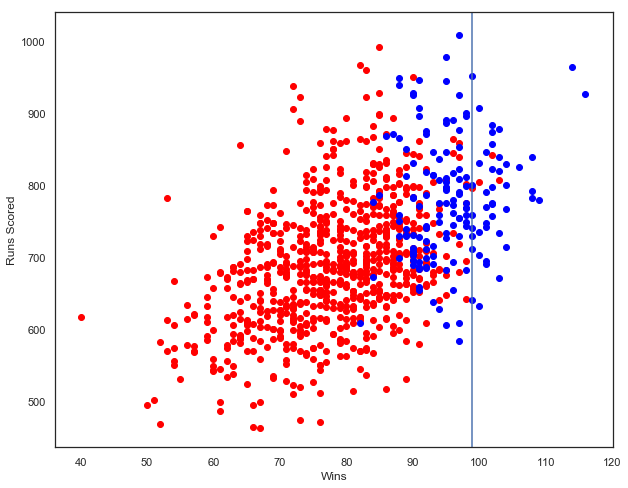

In [84]:
# Plotting scatterplot
plt.figure(figsize=(10,8))
plt.scatter(x=mbnoplayoffs.W,y = mbnoplayoffs.RS,c="red")
plt.scatter(x=mbplayoffs.W,y = mbplayoffs.RS,c="blue")
plt.xlabel("Wins")
plt.ylabel("Runs Scored")
plt.axvline(x = 99)

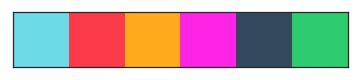

In [85]:
flatui = ["#6cdae7", "#fd3a4a", "#ffaa1d", "#ff23e5", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())

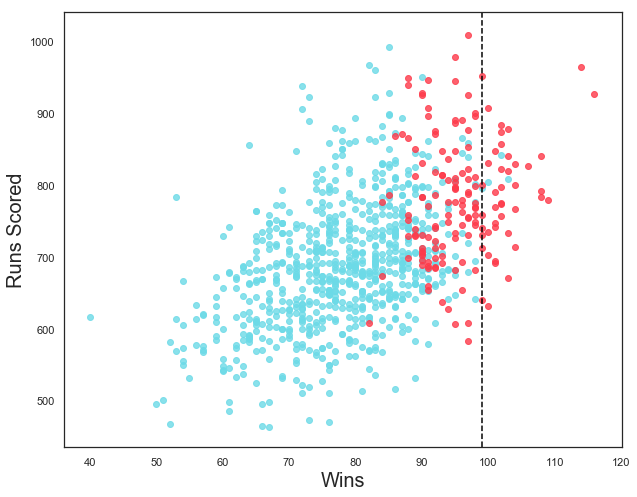

In [86]:
sns.regplot(x = mbnoplayoffs["W"], y = mbnoplayoffs["RS"], fit_reg = False)
sns.regplot(x = mbplayoffs["W"], y = mbplayoffs["RS"], fit_reg = False)
plt.xlabel("Wins", fontsize = 20)
plt.ylabel("Runs Scored", fontsize = 20)
plt.axvline(99, 0, 1, color = "Black", ls = '--')
plt.show()

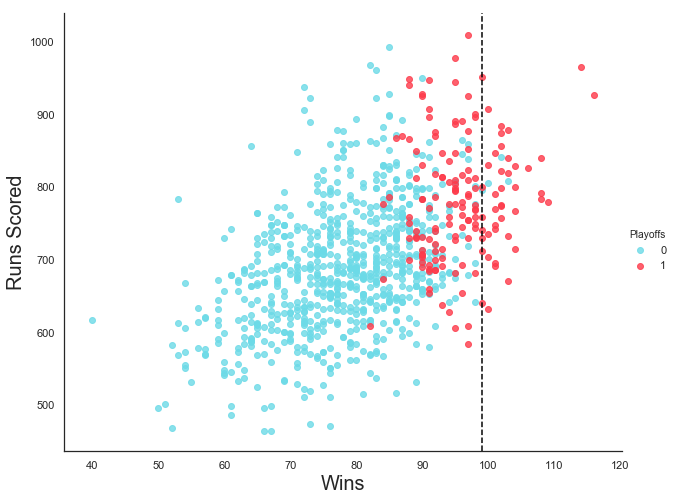

In [91]:
sns.lmplot(x = "W", y = "RS", fit_reg = False, hue = "Playoffs", data=df,height=7, aspect=1.25)
plt.xlabel("Wins", fontsize = 20)
plt.ylabel("Runs Scored", fontsize = 20)
plt.axvline(99, 0, 1, color = "Black", ls = '--')
plt.show()

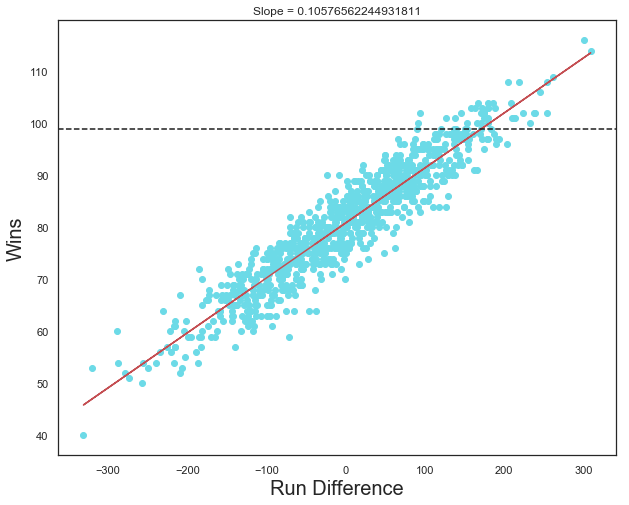

In [25]:
x = np.array(df.RD)
y = np.array(df.W)
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'r')
plt.title("Slope = %s" % (slope), fontsize = 12)
plt.xlabel("Run Difference", fontsize =20)
plt.ylabel("Wins", fontsize = 20)
plt.axhline(99, 0, 1, color = "k", ls = '--')
plt.show()

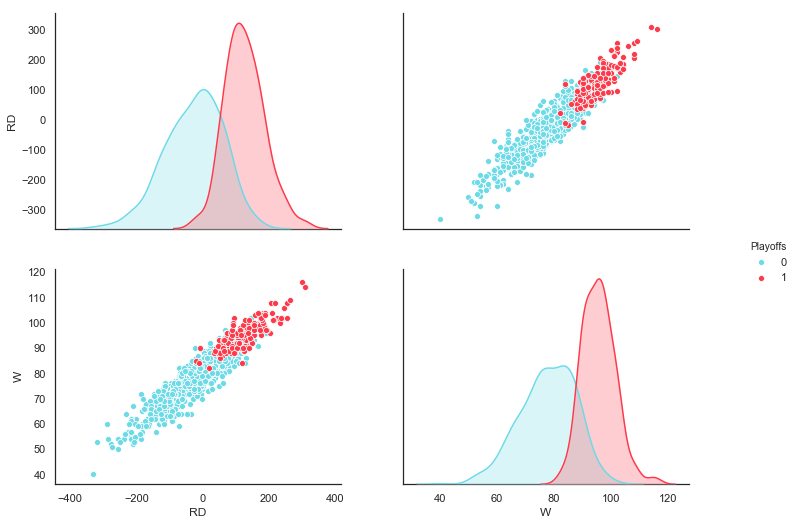

In [92]:
corrcheck = df[['RD', 'W', 'Playoffs']].copy()
g = sns.pairplot(corrcheck, hue = 'Playoffs',vars=["RD", "W"])
g.fig.set_size_inches(12,8)

In [12]:
corrcheck.corr(method='pearson')

,RD,W,Playoffs
RD,1.000000,0.938515,0.566274
W,0.938515,1.000000,0.588978
Playoffs,0.566274,0.588978,1.000000


In [97]:
podesta = df[['OBP','SLG','BA','RS']]
podesta.corr(method='pearson')

,OBP,SLG,BA,RS
OBP,1.000000,0.806154,0.854055,0.904909
SLG,0.806154,1.000000,0.814068,0.926384
BA,0.854055,0.814068,1.000000,0.831625
RS,0.904909,0.926384,0.831625,1.000000


In [14]:
moneyball = df.dropna()

In [15]:
moneyball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
338,CLE,AL,2001,897,821,91,0.350,0.458,0.278,1,6.0,4.0,162,0.341,0.417,76
342,HOU,NL,2001,847,769,93,0.347,0.451,0.271,1,4.0,4.0,162,0.325,0.437,78
349,NYY,AL,2001,804,713,95,0.334,0.435,0.267,1,3.0,2.0,161,0.318,0.398,91


In [108]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#we use RD as the target column
X = moneyball.iloc[:,6:9] 
y = moneyball.iloc[:,-1] 
#apply SelectKBest class to get best features
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(3,'Score')) 

  Feature     Score
1     SLG  0.008951
0     OBP  0.006262
2      BA  0.004577


[0.37890909 0.34       0.28109091]


/anaconda2/envs/hbittenpy3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0, 0.5, 'Statistic')

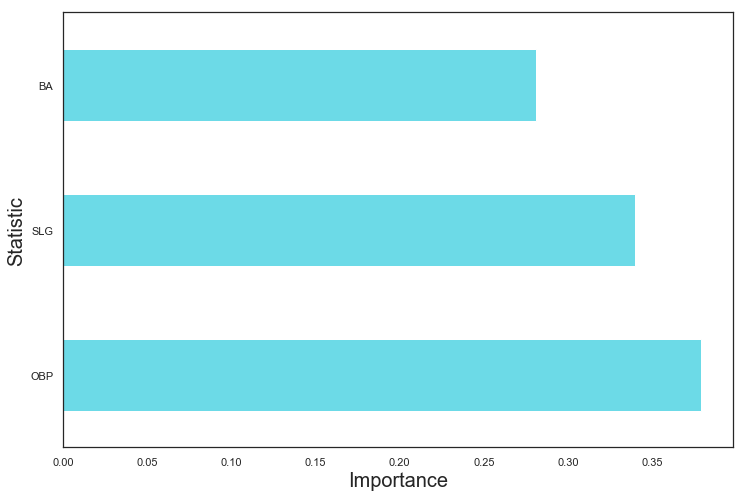

In [39]:
X = moneyball.iloc[:,6:9]  #independent columns
y = moneyball.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(3).plot(kind='barh', figsize = (12,8))
plt.xlabel("Importance", fontsize = 20)
plt.ylabel("Statistic", fontsize = 20)

In [109]:
x = df[['OBP','SLG']].values
y = df[['RS']].values
Runs = linear_model.LinearRegression()
Runs.fit(x,y)

print(Runs.intercept_)
print(Runs.coef_)

[-804.62706106]
[[2737.76802227 1584.90860546]]


In [110]:
x = moneyball[['OOBP','OSLG']].values
y = moneyball[['RA']].values
RunsAllowed = linear_model.LinearRegression()
RunsAllowed.fit(x,y)

print(RunsAllowed.intercept_)
print(RunsAllowed.coef_)

[-775.16234861]
[[3225.00378812 1106.50390975]]


In [111]:
x = moneyball[['RD']].values
y = moneyball[['W']].values
Wins = linear_model.LinearRegression()
Wins.fit(x,y)

print(Wins.intercept_)
print(Wins.coef_)

[84.09190385]
[[0.08469339]]


In [112]:
# Prediction for runs scored.
Runs.predict([[0.339,0.430]])

array([[804.98699884]])

In [113]:
# Predictions for runs allowed.
RunsAllowed.predict([[0.307,0.373]])

array([[627.63977268]])

In [114]:
Wins.predict([[177]])

array([[99.08263325]])